# ÁRBOLES DE DECISIÓN 

![Imagen de WhatsApp 2024-03-28 a las 07.35.04_acbfc4a6.jpg](<attachment:Imagen de WhatsApp 2024-03-28 a las 07.35.04_acbfc4a6.jpg>)
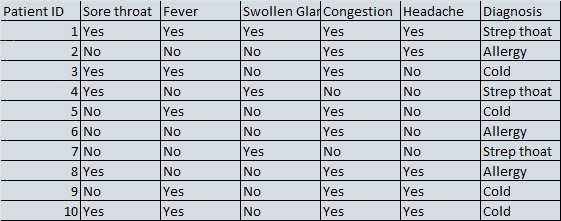


### Transformaciones 
- Yes = 1
- No = 0
- Strep thoat = 0
- Allergy = 1
- Cold = 2

In [1]:
# !pip install -U scikit-learn

In [2]:
# #? Cargamos las librerias
from sklearn import tree 

#### Carga de datos 

In [3]:
# Variables Independientes
 
vi = [[1,1,1,1,1], [0,0,0,1,1], [1,1,0,1,0],[1,0,1,0,0],[0,1,0,1,0],
      [0,0,0,1,0],[0,0,1,0,0],[1,0,0,1,1],[0,1,0,1,1],[1,1,0,1,1]]

# Variable dependiente

vd = [0,1,2,0,2,1,0,1,2,2]

In [4]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(vi, vd)

# Predicciones

predicciones = clasificador.predict([[0,0,0,0,0]])

if predicciones == 0:
    print('Faringitis')
elif predicciones == 1:
    print('Alergia')
else:
    print('Resfriado')
 

Alergia


### Cargamos los datos desde un archivo .CSV

In [5]:
# Cargamos las librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [6]:
datos = pd.read_csv("./IN 05 1 - Diagnostico.csv", sep=';')
datos

,Patient ID,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,1,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,2,No,No,No,Yes,Yes,Allergy
2,3,Yes,Yes,No,Yes,No,Cold
3,4,Yes,No,Yes,No,No,Strep thoat
4,5,No,Yes,No,Yes,No,Cold
5,6,No,No,No,Yes,No,Allergy
6,7,No,No,Yes,No,No,Strep thoat
7,8,Yes,No,No,Yes,Yes,Allergy
8,9,No,Yes,No,Yes,Yes,Cold
9,10,Yes,Yes,No,Yes,Yes,Cold


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient ID      10 non-null     int64 
 1   Sore throat     10 non-null     object
 2   Fever           10 non-null     object
 3   Swollen Glands  10 non-null     object
 4   Congestion      10 non-null     object
 5   Headache        10 non-null     object
 6   Diagnosis       10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


#### Borramos la columna Patient ID

In [8]:
datos = datos.drop(['Patient ID'], axis=1)

In [9]:
datos

,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold
5,No,No,No,Yes,No,Allergy
6,No,No,Yes,No,No,Strep thoat
7,Yes,No,No,Yes,Yes,Allergy
8,No,Yes,No,Yes,Yes,Cold
9,Yes,Yes,No,Yes,Yes,Cold


###  Renombramos las etiquetas de las columnas del dataset

In [10]:
datos = datos.rename(columns={'Sore throat':'Garganta',
                              'Fever':'Fiebre',	
                              'Swollen Glands':'Inflamacion',
                              'Congestion':'Congestion',	
                              'Headache':'Dolor',
                              'Diagnosis':'Diagnostico'})
datos

,Garganta,Fiebre,Inflamacion,Congestion,Dolor,Diagnostico
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold
5,No,No,No,Yes,No,Allergy
6,No,No,Yes,No,No,Strep thoat
7,Yes,No,No,Yes,Yes,Allergy
8,No,Yes,No,Yes,Yes,Cold
9,Yes,Yes,No,Yes,Yes,Cold


### Transformamos los valores nominales a numéricos 

In [11]:
d = {'Yes':1, 'No':0}

datos['Garganta'] = datos['Garganta'].map(d)
datos['Fiebre'] = datos['Fiebre'].map(d)
datos['Inflamacion'] = datos['Inflamacion'].map(d)
datos['Congestion'] = datos['Congestion'].map(d)
datos['Dolor'] = datos['Dolor'].map(d)

datos.head()

,Garganta,Fiebre,Inflamacion,Congestion,Dolor,Diagnostico
0,1,1,1,1,1,Strep thoat
1,0,0,0,1,1,Allergy
2,1,1,0,1,0,Cold
3,1,0,1,0,0,Strep thoat
4,0,1,0,1,0,Cold


In [12]:
datos

,Garganta,Fiebre,Inflamacion,Congestion,Dolor,Diagnostico
0,1,1,1,1,1,Strep thoat
1,0,0,0,1,1,Allergy
2,1,1,0,1,0,Cold
3,1,0,1,0,0,Strep thoat
4,0,1,0,1,0,Cold
5,0,0,0,1,0,Allergy
6,0,0,1,0,0,Strep thoat
7,1,0,0,1,1,Allergy
8,0,1,0,1,1,Cold
9,1,1,0,1,1,Cold


### Cambiamos las etiquetas de diagnostico
- Strep thoat = 0
- Allergy = 1
- Cold = 2

In [13]:
d = {'Strep thoat':0, 'Allergy':1, 'Cold':2 }

datos['Diagnostico'] = datos['Diagnostico'].map(d)

datos

,Garganta,Fiebre,Inflamacion,Congestion,Dolor,Diagnostico
0,1,1,1,1,1,0
1,0,0,0,1,1,1
2,1,1,0,1,0,2
3,1,0,1,0,0,0
4,0,1,0,1,0,2
5,0,0,0,1,0,1
6,0,0,1,0,0,0
7,1,0,0,1,1,1
8,0,1,0,1,1,2
9,1,1,0,1,1,2


#### Variables dependientes e independientes

In [14]:
# Variables Independientes
 
vi = ['Garganta', 'Fiebre', 'Inflamacion', 'Congestion', 'Dolor']
x = datos[vi].values

# Variable dependiente

y = datos['Diagnostico']

In [15]:
# import warnings
# warnings.filterwarnings('ignore')

### Generar el modelo de clasificacion

In [16]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[0,1,0,0,0]])

if predicciones == 0:
    print('Faringitis')
elif predicciones == 1:
    print('Alergia')
else:
    print('Resfriado')
 

Resfriado
